In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import pandas_profiling

In [9]:
data = pd.read_csv('/Users/niels/Google Drive/DDB 2020-2021/Period 2/5. AI for Business/practise_repo_ai_module/data/raw/housing_data.csv')

In [12]:
pandas_profiling.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


In [5]:
data.shape

(211617, 17)

In [3]:
data.head()

globalId publicatieDatum postcode  koopPrijs  \
0   4388064      2018-07-31   1774PG   139000.0   
1   4388200      2018-09-24   7481LK   209000.0   
2   4399344      2018-08-02   1068MS   267500.0   
3   4400638      2018-08-04   5628EN   349000.0   
4   4401765      2018-08-05   7731TV   495000.0   

                               volledigeOmschrijving  \
0  Ruimte, vrijheid, en altijd het water en de we...   
1  Verrassend ruime tussenwoning nabij het centru...   
2  - ENGLISH TRANSLATION - \n\nOn the 21st of Sep...   
3  Wonen in een zeer royaal bemeten geschakelde 2...   
4  Landgoed Junne is een eeuwenoud landgoed en li...   

                                         soortWoning  categorieObject  \
0                <{woonboot}> <{vrijstaande woning}>     <{Woonhuis}>   
1               <{eengezinswoning}> <{tussenwoning}>     <{Woonhuis}>   
2             <{tussenverdieping}> (<{appartement}>)  <{Appartement}>   
3  <{eengezinswoning}> <{geschakelde 2-onder-1-ka...     <{Woonhuis}>   
4           <{woonboerderij}> <{vrijstaande woning}>     <{Woonhuis}>   

    bouwjaar  indTuin  perceelOppervlakte              kantoor_naam_MD5hash  \
0  1971-1980        1                 NaN  09F114F5C5EC061F6230349892132149   
1       1980        1               148.0  6A91BF7DB06A8DF2C9A89064F28571E7   
2  2001-2010        0                 NaN  E983FEDC63D87BF61AE952D181C8FD17   
3       1973        1               244.0  02BC26608B8B1A0888D3612AC7A5DB5C   
4       1900        0              4500.0  F56B2705CE24B8D78A68481ED1B276CB   

   aantalKamers  aantalBadkamers energielabelKlasse  globalId.1  oppervlakte  \
0             3              NaN                NaN     4388064           62   
1             5              1.0                  B     4388200          136   
2             3              NaN                NaN     4399344           70   
3             5              NaN                NaN     4400638          144   
4             8              1.0                NaN     4401765          323   

  datum_ondertekening  
0          2018-11-12  
1          2018-08-30  
2          2018-11-23  
3          2018-12-14  
4          2018-12-06

In [16]:
feature_cols = ['aantalKamers', 'oppervlakte']

# create a Python list of feature names
X = data[['aantalKamers', 'oppervlakte']]

# print the first 5 rows
X.head()

aantalKamers  oppervlakte
0             3           62
1             5          136
2             3           70
3             5          144
4             8          323

In [17]:
print(X.shape)

(211617, 2)


In [18]:
y = data['koopPrijs']

y.head()

0    139000.0
1    209000.0
2    267500.0
3    349000.0
4    495000.0
Name: koopPrijs, dtype: float64

In [19]:
y = y.replace(['NULL'], np.nan)

y = y.fillna(y.mean())

#s_imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=0)

#s_imputer = s_imputer.fit(y)

In [20]:
print(y.shape)

(211617,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158712, 2)
(158712,)
(52905, 2)
(52905,)


In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
print(linreg.intercept_)
print(linreg.coef_)

30507.12779829011
[-12458.36270961   2907.30234499]


In [30]:
list(zip(feature_cols, linreg.coef_)) 

[('aantalKamers', -12458.362709606248), ('oppervlakte', 2907.3023449925136)]

In [32]:
y_pred = linreg.predict(X_test)

In [38]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [39]:
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [40]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [41]:

# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

154804.7072330865


In [44]:
# create a Python list of feature names
feature_cols = ['oppervlakte']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data['koopPrijs']
y = y.replace(['NULL'], np.nan)
y = y.fillna(y.mean())

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

156617.9024435063


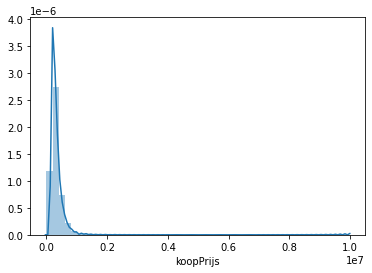

In [70]:
import seaborn as sns
sns.distplot(data['koopPrijs'])

In [58]:
data.head()

globalId publicatieDatum postcode  koopPrijs  \
0   4388064      2018-07-31   1774PG   139000.0   
1   4388200      2018-09-24   7481LK   209000.0   
2   4399344      2018-08-02   1068MS   267500.0   
3   4400638      2018-08-04   5628EN   349000.0   
4   4401765      2018-08-05   7731TV   495000.0   

                               volledigeOmschrijving  \
0  Ruimte, vrijheid, en altijd het water en de we...   
1  Verrassend ruime tussenwoning nabij het centru...   
2  - ENGLISH TRANSLATION - \n\nOn the 21st of Sep...   
3  Wonen in een zeer royaal bemeten geschakelde 2...   
4  Landgoed Junne is een eeuwenoud landgoed en li...   

                                         soortWoning  categorieObject  \
0                <{woonboot}> <{vrijstaande woning}>     <{Woonhuis}>   
1               <{eengezinswoning}> <{tussenwoning}>     <{Woonhuis}>   
2             <{tussenverdieping}> (<{appartement}>)  <{Appartement}>   
3  <{eengezinswoning}> <{geschakelde 2-onder-1-ka...     <{Woonhuis}>   
4           <{woonboerderij}> <{vrijstaande woning}>     <{Woonhuis}>   

    bouwjaar  indTuin  perceelOppervlakte              kantoor_naam_MD5hash  \
0  1971-1980        1                 NaN  09F114F5C5EC061F6230349892132149   
1       1980        1               148.0  6A91BF7DB06A8DF2C9A89064F28571E7   
2  2001-2010        0                 NaN  E983FEDC63D87BF61AE952D181C8FD17   
3       1973        1               244.0  02BC26608B8B1A0888D3612AC7A5DB5C   
4       1900        0              4500.0  F56B2705CE24B8D78A68481ED1B276CB   

   aantalKamers  aantalBadkamers energielabelKlasse  globalId.1  oppervlakte  \
0             3              NaN                NaN     4388064           62   
1             5              1.0                  B     4388200          136   
2             3              NaN                NaN     4399344           70   
3             5              NaN                NaN     4400638          144   
4             8              1.0                NaN     4401765          323   

  datum_ondertekening  
0          2018-11-12  
1          2018-08-30  
2          2018-11-23  
3          2018-12-14  
4          2018-12-06

In [55]:
np.mean(data['koopPrijs'])

321384.9496244238